# Baseline Transfer Learning Model

## Model Used
- Pre-trained **ResNet50**  from Keras Applications.

## Training Summary
- Model trained with frozen base layers.
- Evaluated on validation dataset.
- Plotted accuracy and loss curves.




Found 992 files belonging to 8 classes.
Using 794 files for training.
Found 992 files belonging to 8 classes.
Using 198 files for validation.
Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.2139 - loss: 1.9704 - val_accuracy: 0.7071 - val_loss: 1.3706
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.6951 - loss: 1.2456 - val_accuracy: 0.7828 - val_loss: 0.9554
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8126 - loss: 0.8492 - val_accuracy: 0.8232 - val_loss: 0.7666
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8833 - loss: 0.6401 - val_accuracy: 0.8333 - val_loss: 0.6523
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9146 - loss: 0.5397 - val_accuracy: 0.8586 - val_loss: 0.5904
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9258 - loss: 0.4627 - val_accuracy: 0.8636 - val_loss: 0.5245
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.9209 - loss: 0.4018 - val_accuracy: 0.

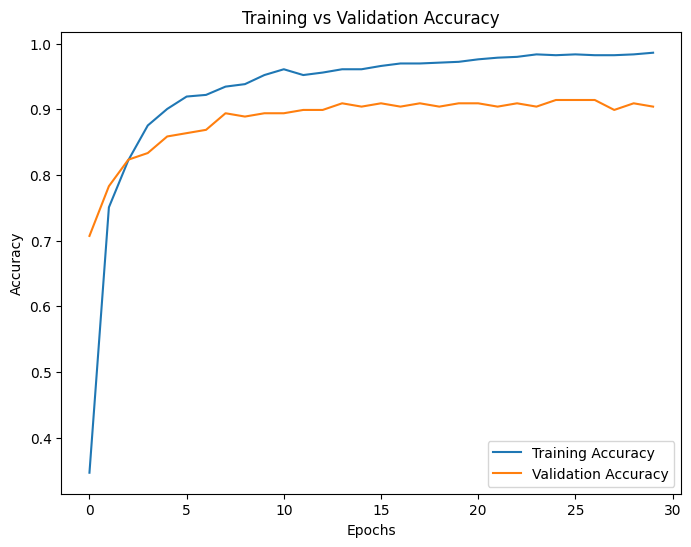

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers
from data_loader import load_dataset
import matplotlib.pyplot as plt

#  Load Data with 8 classes
train_ds, val_ds = load_dataset('./plantdisease_subset')

#  Create Model with 8 Output Classes
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(8, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

#  Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

#  Plot Accuracy Curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#  Save Model
model.save('efficientnetb0_plant_disease.keras')


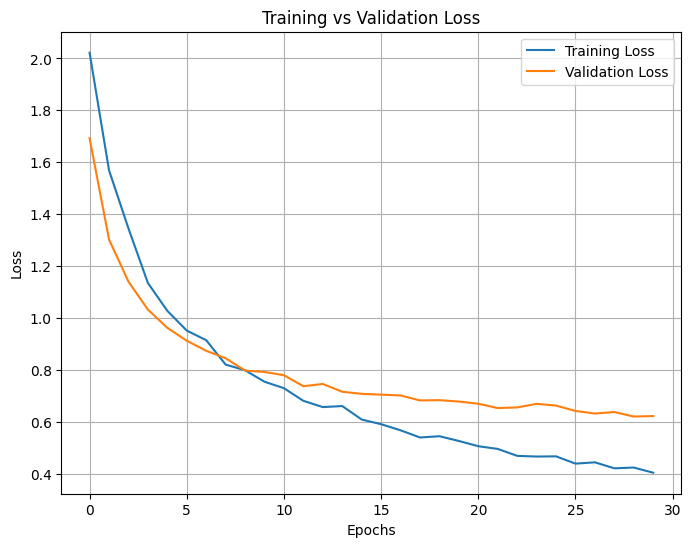

In [ ]:


#  Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 992 files belonging to 8 classes.
Using 794 files for training.
Found 992 files belonging to 8 classes.
Using 198 files for validation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<Figure size 1000x800 with 0 Axes>

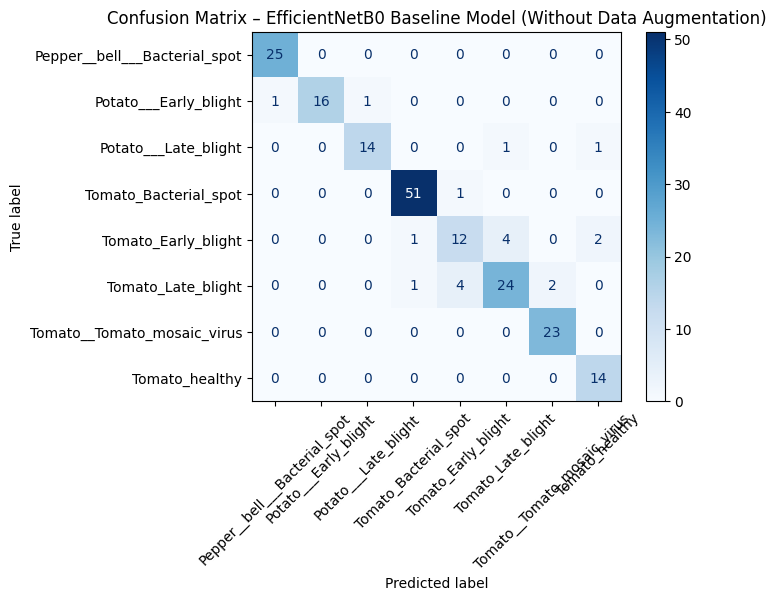


Classification Report – EfficientNetB0 Baseline Model (Without Data Augmentation):

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.96      1.00      0.98        25
        Potato___Early_blight       1.00      0.89      0.94        18
         Potato___Late_blight       0.93      0.88      0.90        16
        Tomato_Bacterial_spot       0.96      0.98      0.97        52
          Tomato_Early_blight       0.71      0.63      0.67        19
           Tomato_Late_blight       0.83      0.77      0.80        31
  Tomato__Tomato_mosaic_virus       0.92      1.00      0.96        23
               Tomato_healthy       0.82      1.00      0.90        14

                     accuracy                           0.90       198
                    macro avg       0.89      0.89      0.89       198
                 weighted avg       0.90      0.90      0.90       198



In [ ]:
model = tf.keras.models.load_model('efficientnetb0_plant_disease.keras')

_, val_ds = load_dataset('./plantdisease_subset')


class_names = val_ds.class_names

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds_class = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds_class)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix – EfficientNetB0 Baseline Model (Without Data Augmentation)")
plt.show()

print("\nClassification Report – EfficientNetB0 Baseline Model (Without Data Augmentation):\n")
print(classification_report(y_true, y_pred, target_names=class_names))


# Baseline Model Evaluation Summary (Without Data Augmentation)

##  Training Insights:
- The model showed a steady improvement in both **training** and **validation accuracy**, reaching around **90% validation accuracy**.
- Loss curves decreased consistently without significant overfitting.
- Performance stabilized after approximately **15-20 epochs**.

---

##  Confusion Matrix Observations:
- Most classes were correctly predicted with very few misclassifications.
- **Pepper__bell___Bacterial_spot**, **Tomato_Bacterial_spot**, **Tomato__Tomato_mosaic_virus**, and **Tomato_healthy** showed excellent performance with near-perfect classification.
- **Tomato_Early_blight** and **Tomato_Late_blight** exhibited some confusion, likely due to visual similarities.
- **Potato_Late_blight** had slight confusion with **Tomato_Late_blight**.

---

##  Classification Report Key Points:
| Class | Precision | Recall | F1-Score |
|---|---|---|---|
| Pepper__bell___Bacterial_spot | 0.96 | 1.00 | 0.98 |
| Potato___Early_blight | 1.00 | 0.89 | 0.94 |
| Potato___Late_blight | 0.93 | 0.88 | 0.90 |
| Tomato_Bacterial_spot | 0.96 | 0.98 | 0.97 |
| Tomato_Early_blight | 0.71 | 0.63 | 0.67 |
| Tomato_Late_blight | 0.83 | 0.77 | 0.80 |
| Tomato__Tomato_mosaic_virus | 0.92 | 1.00 | 0.96 |
| Tomato_healthy | 0.82 | 1.00 | 0.90 |

- **Overall Accuracy:** **90%**
- **Macro Average F1-Score:** **0.89**
- **Weighted Average F1-Score:** **0.90**

---

##Conclusion:
- The baseline model performed well on most disease categories.
- Mild confusion exists between some similar-looking diseases (especially blights).
- Strong baseline for comparison against models trained with data augmentation or fine-tuning.
